# Proyecto Minería de Datos

**Objetivo General:** Crear un modelo con Machine Learning que pronostique tendencias, para relacionar productos que sean ideales para ventas cruzadas, en base a las transacciones de clientes.

**Dataset:** https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository

**Problema:** Para una empresa cualquiera, le es importante mejorar sus ventas o servicios de acuerdo a las necesidades del cliente. Los grandes negocios implementan procesos inteligentes acorde a las acciones de sus clientes, para lograr mejorar sus ingresos, algunos de estos procedimientos están basados en los conocimientos de marketing, Big Data, Smart Data, estadística. Sin embargo para lograr el objetivo de aumentar las ventas, es necesario tener una base de datos de las transacciones realizadas para el análisis de los datos, por tal motivo en este proyecto se enfoca en la creación de un modelo que pueda
predecir tendencias de agrupaciones de productos en base a las compras realizadas por diferentes clientes en una tienda de regalos del Reino Unido entre el 2009 y 2011.

**Tema:** Modelo de pronóstico de tendencias para ventas cruzadas de una tienda de regalos del
Reino Unido entre el 2009 a 2011

# Librerías

In [1]:
# Usada para la importación de los datos
import pandas as pd
# Usada para la graficación
import matplotlib.pyplot as plt
# Usada para la graficación
import seaborn as sns
# La escala para normalización
from sklearn.preprocessing import StandardScaler, RobustScaler
# Para la separación del dataset
from sklearn.model_selection import train_test_split
# Para selección de características
from sklearn.ensemble import RandomForestClassifier
# Para el preprocesamiento de los datos
from sklearn import preprocessing
# Para bining
import numpy as np
# Para onehot encoder
from sklearn.preprocessing import OneHotEncoder
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
#*************MODELOS*************
#árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#SVM
from sklearn import svm
# métricas de rendimiento
from sklearn import metrics
# Para las reglas de asociación
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

## Carga del dataset

En este apartado se hace un análisis de los datos, para saber si existen datos nulos, el número de registros, distribución de los datos.

**IMPORTACIÓN DEL DATASET**

In [2]:
#Función para la lectura del dataset
def importdata():
    df = pd.read_csv('dataset/originales/Year_2010-2011.csv',encoding='unicode_escape')
    print("\n **Estadísticas del dataset:** \n", df.describe().T)
    print("\n **Tamaño del dataset:** \n", df.shape)
    print("\n **Tipos de datos del dataset:** \n", df.dtypes)
    return df

In [3]:
def importdata2():
    df_ = pd.read_excel("dataset/online_retail_II.xlsx", sheet_name= "Year 2010-2011")
    df = df_.copy()
    return df

In [3]:
df=importdata()
df


 **Estadísticas del dataset:** 
                 count          mean          std       min       25%       50%       75%      max
Quantity     541910.0      9.552234   218.080957 -80995.00      1.00      3.00     10.00  80995.0
Price        541910.0      4.611138    96.759765 -11062.06      1.25      2.08      4.13  38970.0
Customer ID  406830.0  15287.684160  1713.603074  12346.00  13953.00  15152.00  16791.00  18287.0

 **Tamaño del dataset:** 
 (541910, 8)

 **Tipos de datos del dataset:** 
 Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Customer ID'}>, <AxesSubplot:>]],
      dtype=object)

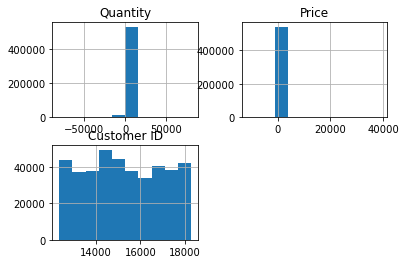

In [5]:
df.hist()

## Verificación y limpieza

**DATOS NULOS**

In [5]:
#Función para ver si existen datos nulos
def datosnull(df):
    existen_bol=1
    total_register=len(df.index)
    total_nan_values = df.isnull().sum().sum()
    existen=total_register-total_nan_values
    vars_with_na=columnan(df)
    if(existen != 0):
        print("\n ** Número de datos nulos: **\n", total_nan_values)
        print("\n ** Columnas con datos nulos: ** \n", df[vars_with_na].dtypes)
        print("\n ** Número de registros finales: ", existen ," registros de: ", len(df), " registros **")
        df=eraseregis(df)
        print(" \n Registros nulos borrados! \n")
        return existen_bol, df        
    else:
        print("\n No existen datos nulos\n ")

In [6]:
#Función para eliminación de registros con datos nulos
def eraseregis(data):
    data = data.dropna()
    return data

In [7]:
# Función para ver las columnas con datos nulos
def columnan(data):
    vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
    return vars_with_na

In [8]:
existen_bol, df_sin_nan=datosnull(df)


 ** Número de datos nulos: **
 136534

 ** Columnas con datos nulos: ** 
 Description     object
Customer ID    float64
dtype: object

 ** Número de registros finales:  405376  registros de:  541910  registros **
 
 Registros nulos borrados! 



In [9]:
# Creación del dataset solo con United Kingdom
def selecUnitedKingdom(df):
    indices = []
    #df_new = pd.DataFrame()
    for i in df.index: 
         if(df["Country"][i] == "United Kingdom"):
            #df_new.append(df.loc[[i]])
            indices.append(i)
    return indices

<AxesSubplot:>

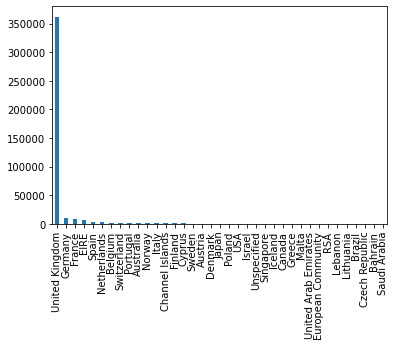

In [10]:
df_sin_nan.Country.value_counts().plot(kind = "bar")

In [11]:
df_united_2=selecUnitedKingdom(df_sin_nan)

In [12]:
df_united = df.iloc[df_united_2]
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


<AxesSubplot:>

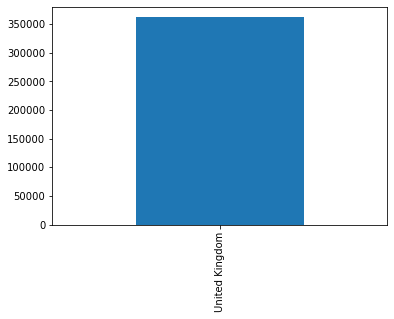

In [13]:
df_united.Country.value_counts().plot(kind = "bar")

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Customer ID'}>, <AxesSubplot:>]],
      dtype=object)

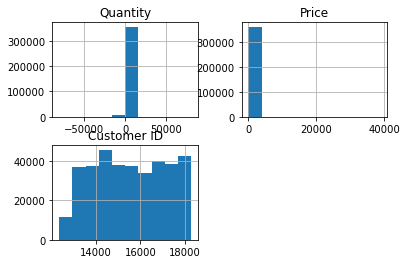

In [14]:
df_united.hist()

In [15]:
# Función que convierte a enteros después de eliminar datos nulos 
def eliminaregistros(x):
    #Elimina los registros que tenga valor NaN
    existen_bol, df_sin_nan = datosnull(x)
    #Convierte a entero
    df_sin_nan=df_sin_nan.astype(int)
    print("Nuevo dataset: \n", df_sin_nan)
    print("Tipos de datos: \n", df_sin_nan.dtypes)
    return df_sin_nan

In [16]:
# Se crea el conteo de los registros repetidos en descripción
dups = df_sin_nan.pivot_table(index=['Description'], aggfunc ='size') 
# Se crea un data frame y se añade la columna 'Repeticion'
gh = pd.DataFrame(dups, columns=['Repeticion'])
# Se observa el número de repeticiones de Descripción en orden
by_repet = gh.sort_values('Repeticion',ascending=False)
by_repet.head(50)

,Repeticion
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416
LUNCH BAG RED RETROSPOT,1358
SET OF 3 CAKE TINS PANTRY DESIGN,1232
POSTAGE,1197
LUNCH BAG BLACK SKULL.,1126


In [17]:
df_united.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [18]:
# Verifica los registros en Invoice que contenga C
# Los registros con C, significan que han sido canceladas, por tal motivo se les borra
verificar = np.where(df_united['Invoice'].str.contains('C', regex=True).tolist())
verificar

(array([   121,    134,    201, ..., 361763, 361764, 361765], dtype=int64),)

In [19]:
verificar2 = df_united.iloc[verificar].index
verificar2

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,    937,
            ...
            540141, 540142, 540143, 540422, 540448, 540449, 541541, 541715, 541716, 541717], dtype='int64', length=7533)

In [20]:
df_united.iloc[[157]]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 9:57,1.65,16029.0,United Kingdom


In [21]:
df_united = df_united.drop(verificar2)

In [22]:
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [25]:
# Escalamiento de valores atípicos
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Customer ID'}>, <AxesSubplot:>]],
      dtype=object)

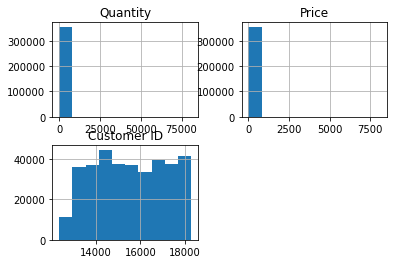

In [26]:
df_united.hist()

In [27]:
def valatipic(df_united):
    replace_with_thresholds(df_united, "Quantity")
    replace_with_thresholds(df_united, "Price")
    return df_united
df = valatipic(df_united)
df.head

<bound method NDFrame.head of        Invoice StockCode                          Description  Quantity      InvoiceDate  Price  Customer ID         Country
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   12/1/2010 8:26   2.55      17850.0  United Kingdom
1       536365     71053                  WHITE METAL LANTERN       6.0   12/1/2010 8:26   3.39      17850.0  United Kingdom
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   12/1/2010 8:26   2.75      17850.0  United Kingdom
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   12/1/2010 8:26   3.39      17850.0  United Kingdom
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   12/1/2010 8:26   3.39      17850.0  United Kingdom
...        ...       ...                                  ...       ...              ...    ...          ...             ...
541889  581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT      12.0  12/9/2011 12:31   1.95

In [28]:
df_united=valatipic(df_united)

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Customer ID'}>, <AxesSubplot:>]],
      dtype=object)

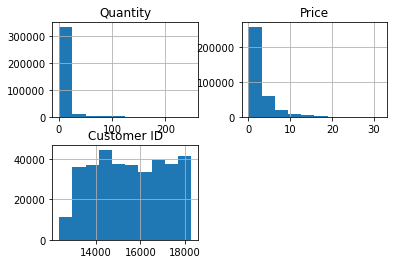

In [29]:
df_united.hist()

In [30]:
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8.0,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24.0,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [23]:
#Función para realizar algunos procesos en los datos para limpiarlos y borrar registros con errores
def limpieza(x):
    #Elimina letras del StockCode
    x['Invoice'] = x['Invoice'].replace({'[A-Z]':''}, regex=True)
    #Para convertir StockCode de objeto a numérico
    x['Invoice'] = pd.to_numeric(x['StockCode'], errors='coerce')
    print("Nuevo dataset: \n", x)
    print("Tipos de datos: \n", x.dtypes)
    return x

In [24]:
df_united=limpieza(df_united)

Nuevo dataset: 
         Invoice StockCode                          Description  Quantity      InvoiceDate  Price  Customer ID         Country
0           NaN    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   12/1/2010 8:26   2.55      17850.0  United Kingdom
1       71053.0     71053                  WHITE METAL LANTERN         6   12/1/2010 8:26   3.39      17850.0  United Kingdom
2           NaN    84406B       CREAM CUPID HEARTS COAT HANGER         8   12/1/2010 8:26   2.75      17850.0  United Kingdom
3           NaN    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   12/1/2010 8:26   3.39      17850.0  United Kingdom
4           NaN    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   12/1/2010 8:26   3.39      17850.0  United Kingdom
...         ...       ...                                  ...       ...              ...    ...          ...             ...
541889  22466.0     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12  12/9/2011 12:31   1.95     

In [25]:
existen_bol, df_united=datosnull(df_united)
df_united


 ** Número de datos nulos: **
 30760

 ** Columnas con datos nulos: ** 
 Invoice    float64
dtype: object

 ** Número de registros finales:  323585  registros de:  354345  registros **
 
 Registros nulos borrados! 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,71053.0,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,22752.0,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,21730.0,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,22633.0,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,22632.0,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,22466.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,22061.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,23275.0,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,21217.0,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [26]:
df_united.dtypes

Invoice        float64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [29]:
# Seleccionar todas las columnas de que serán transformadas a numéricos
df_sin_nan_2 = df_united[["StockCode","InvoiceDate","Description"]]
df_sin_nan_2.head(3)

,StockCode,InvoiceDate,Description
1,71053,12/1/2010 8:26,WHITE METAL LANTERN
5,22752,12/1/2010 8:26,SET 7 BABUSHKA NESTING BOXES
6,21730,12/1/2010 8:26,GLASS STAR FROSTED T-LIGHT HOLDER


In [30]:
# Comprobar las columnas que se cogen que sean de tipo objeto
df_sin_nan_2.columns

Index(['StockCode', 'InvoiceDate', 'Description'], dtype='object')

In [31]:
# Transfomración de datos categóricos a numéricos
le = preprocessing.LabelEncoder()
# Se transforman todas las columnas
X_2 = df_sin_nan_2.apply(le.fit_transform)
X_2

,StockCode,InvoiceDate,Description
1,2423,4646,2843
5,1529,4646,2245
6,680,4646,1074
7,1414,4647,1151
8,1413,4647,1148
...,...,...,...
541889,1256,6368,857
541890,889,6369,1395
541891,2025,6369,2276
541892,356,6369,2061


In [32]:
# Selección de columnas para el primer conjunto de datos
columns_use = ["Invoice", "Customer ID", "Quantity","Price"]

In [39]:
df_2 = df_united[columns_use]
df_2

,Invoice,Customer ID,Quantity,Price
1,71053.0,17850.0,6,3.39
5,22752.0,17850.0,2,7.65
6,21730.0,17850.0,6,4.25
7,22633.0,17850.0,6,1.85
8,22632.0,17850.0,6,1.85
...,...,...,...,...
541889,22466.0,15804.0,12,1.95
541890,22061.0,13113.0,8,2.95
541891,23275.0,13113.0,24,1.25
541892,21217.0,13113.0,24,8.95


In [40]:
# Unión de los dos conjuntos de datos
def uniondatos(df_1, df_2):
    df_unido = pd.concat([df_1, df_2], axis=1,)
    return df_unido

In [41]:
# Unión de los dos conjuntos de datos
df_unido = uniondatos(df_2, X_2)
df_unido.dtypes

Invoice        float64
Customer ID    float64
Quantity         int64
Price          float64
StockCode        int32
InvoiceDate      int32
Description      int32
dtype: object

In [36]:
df_int=df_unido[["Customer ID", "Invoice"]].astype(int)

In [42]:
df_unido=df_unido.drop(['Customer ID'], axis=1)
df_unido=df_unido.drop(['Invoice'], axis=1)

In [43]:
df_unido=uniondatos(df_int, df_unido)
df_unido

,Customer ID,Invoice,Quantity,Price,StockCode,InvoiceDate,Description
1,17850,71053,6,3.39,2423,4646,2843
5,17850,22752,2,7.65,1529,4646,2245
6,17850,21730,6,4.25,680,4646,1074
7,17850,22633,6,1.85,1414,4647,1151
8,17850,22632,6,1.85,1413,4647,1148
...,...,...,...,...,...,...,...
541889,15804,22466,12,1.95,1256,6368,857
541890,13113,22061,8,2.95,889,6369,1395
541891,13113,23275,24,1.25,2025,6369,2276
541892,13113,21217,24,8.95,356,6369,2061


In [45]:
df_unido['total'] = df_unido['Price']*df_unido['Quantity']
df_unido

,Customer ID,Invoice,Quantity,Price,StockCode,InvoiceDate,Description,total
1,17850,71053,6,3.39,2423,4646,2843,20.34
5,17850,22752,2,7.65,1529,4646,2245,15.30
6,17850,21730,6,4.25,680,4646,1074,25.50
7,17850,22633,6,1.85,1414,4647,1151,11.10
8,17850,22632,6,1.85,1413,4647,1148,11.10
...,...,...,...,...,...,...,...,...
541889,15804,22466,12,1.95,1256,6368,857,23.40
541890,13113,22061,8,2.95,889,6369,1395,23.60
541891,13113,23275,24,1.25,2025,6369,2276,30.00
541892,13113,21217,24,8.95,356,6369,2061,214.80


In [50]:
df_unido.describe()

,Customer ID,Invoice,Quantity,Price,StockCode,InvoiceDate,Description,total
count,323585.000000,323585.000000,323585.000000,323585.000000,323585.000000,323585.000000,323585.000000,323585.000000
mean,15551.719570,27193.756472,12.076138,2.878701,1359.040713,7436.295588,1511.897313,20.468713
std,1594.657758,16026.143991,198.948548,4.423595,693.897619,4567.566821,830.169241,339.878726
min,12346.000000,10002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14194.000000,21967.000000,2.000000,1.250000,833.000000,3341.000000,849.000000,4.200000
50%,15525.000000,22607.000000,4.000000,1.740000,1389.000000,7163.000000,1479.000000,10.200000
75%,16931.000000,23177.000000,12.000000,3.750000,1936.000000,11518.000000,2205.000000,17.700000
max,18287.000000,90208.000000,80995.000000,649.500000,2778.000000,15411.000000,2965.000000,168469.600000


In [38]:
# Separado para realizar la estandarización
for_standa_p = pd.DataFrame(df_unido[['Price']])
for_norma_p = pd.DataFrame(df_unido[['Price']])
for_min_p = pd.DataFrame(df_unido[['Price']])

In [39]:
# Separando para la normalización
for_standa_q = pd.DataFrame(df_unido[['Quantity']])
for_norma_q = pd.DataFrame(df_unido[['Quantity']])
for_min_q = pd.DataFrame(df_unido[['Quantity']])

In [36]:
df_unido=df_unido.drop(['Price'], axis=1)
df_unido=df_unido.drop(['Quantity'], axis=1)

In [40]:
df_unido

,StockCode,Customer ID,Invoice,Description,Quantity,Price,InvoiceDate
0,2526,13085,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,4839
3,1127,13085,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,4839
4,497,13085,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,4839
5,1150,13085,22064,PINK DOUGHNUT TRINKET POT,24,1.65,4839
6,1017,13085,21871,SAVE THE PLANET MUG,24,1.25,4839
...,...,...,...,...,...,...,...
525456,1342,17530,22271,FELTCRAFT DOLL ROSIE,2,2.95,6686
525457,1793,17530,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,6686
525458,1794,17530,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,6686
525459,295,17530,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,6686


## Ingeniería de características

**DIVISIÓN DEL DATASET y HALLAR X, Y**

In [41]:
#División del dataset, en conjunto de datos de entrenamiento y otro conjunto para las pruebas
def slipdata(df, nombreColumna):
    # Selección de características
    x = df.drop(nombreColumna, axis=1)
    y = df[nombreColumna]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    return X_train, X_test, y_train, y_test

**ESTANDARIZACIÓN**

In [42]:
#Estandarización de la columna Price
def estandarizacion(df_unido, nombreColumna):
    Standariza=(df_unido[nombreColumna]-df_unido[nombreColumna].mean())/df_unido[nombreColumna].std()
    Standariza = pd.DataFrame(Standariza)
    return Standariza

**NORMALIZATION**

In [43]:
#Estandarización de la columna Price
def normalizacion(df_unido, nombreColumna):
    Norma=(df_unido[nombreColumna]-df_unido[nombreColumna].mean())/(df_unido[nombreColumna].max()-df_unido[nombreColumna].min())
    Norma = pd.DataFrame(Norma)
    return Norma

**MIN-MAX**

In [44]:
#Estandarización de la columna Price
def minmaxion(df_unido, nombreColumna):
    Norma=(df_unido[nombreColumna]-df_unido[nombreColumna].min())/(df_unido[nombreColumna].max()-df_unido[nombreColumna].min())
    Norma = pd.DataFrame(Norma)
    return Norma

In [45]:
# Función de la gráfica de la estandarización
def graficar(X_train,X_train_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

    for (label, content) in X_train.iteritems():
        ax1.set_title('Antes del escalado')
        sns.kdeplot(X_train[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper right", bbox_to_anchor=[0, 1], ncol=2, shadow=True, title="Características", fancybox=True)
    
    for (label, content) in X_train_scaled.iteritems():
        ax2.set_title('Después del escalado')
        sns.kdeplot(X_train_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper right", bbox_to_anchor=[0, 1], ncol=2, shadow=True, title="Características", fancybox=True)

    plt.show()

In [47]:
Standariza_precio=estandarizacion(for_standa_p, 'Price')
Normaliza_precio=normalizacion(for_norma_p, 'Price')
Min_precio=minmaxion(for_min_p, 'Price')

In [51]:
Standariza_cantidad=estandarizacion(for_standa_q, 'Quantity')
Normaliza_cantidad=normalizacion(for_norma_q, 'Quantity')
Min_cantidad=minmaxion(for_min_q, 'Quantity')

In [49]:
#StockCode	Description	InvoiceDate	Country
Standariza_StockCode=estandarizacion(X_2, 'StockCode')
#Standariza_Description=estandarizacion(X_2, 'Description')
Standariza_Invoice=estandarizacion(X_2, 'InvoiceDate')
Standariza_Customer=estandarizacion(df_unido, 'Customer ID')

In [52]:
#Unión de datos estandarizados con los actuales
#data_unido2=uniondatos(Standariza_precio, Normaliza_cantidad)
data_unido2=uniondatos(Standariza_precio, Normaliza_precio)
data_unido2=uniondatos(Min_precio, data_unido2)
data_unido2=uniondatos(Standariza_cantidad, data_unido2)
data_unido2=uniondatos(Normaliza_cantidad, data_unido2)
data_unido2=uniondatos(Min_cantidad, data_unido2)

In [53]:
data_unido2=uniondatos(Standariza_StockCode, data_unido2)
data_unido2=uniondatos(df_unido['Description'], data_unido2)
data_unido2=uniondatos(Standariza_Invoice, data_unido2)
data_unido2=uniondatos(Standariza_Customer, data_unido2)

In [59]:
data_unido2=uniondatos(df_unido[['Price','Quantity']], data_unido2)

In [60]:
data_unido2.dtypes

Price          float64
Quantity         int64
Customer ID    float64
InvoiceDate    float64
Description     object
StockCode      float64
Quantity       float64
Quantity       float64
Quantity       float64
Price          float64
Price          float64
Price          float64
dtype: object

In [83]:
data_unido2

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity,Quantity,Quantity,Price,Price,Price
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426
3,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015
4,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
5,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540
6,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134
525457,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
525458,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
525459,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578


In [94]:
# Transfomración de datos categóricos a numéricos
le = preprocessing.LabelEncoder()
des = pd.DataFrame(data_unido2['Description'])
# Se transforman todas las columnas
pr_tr = des.apply(le.fit_transform)

In [97]:
data_unido2=data_unido2.drop(['Description'], axis=1)
pr_tr_uni = pd.concat([pr_tr, data_unido2], axis=1)
pr_tr_uni

,Description,Price,Quantity,Customer ID,InvoiceDate,StockCode,Quantity,Quantity,Quantity,Price,Price,Price
0,46,6.95,12,-1.554577,-0.643216,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426
3,2135,2.10,48,-1.554577,-0.643216,-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015
4,2727,1.25,24,-1.554577,-0.643216,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
5,1988,1.65,24,-1.554577,-0.643216,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540
6,2378,1.25,24,-1.554577,-0.643216,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,982,2.95,2,1.238773,-0.251354,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134
525457,991,3.75,1,1.238773,-0.251354,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
525458,992,3.75,1,1.238773,-0.251354,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
525459,1992,3.75,2,1.238773,-0.251354,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578


In [98]:
X_train, X_test, y_train, y_test=slipdata(pr_tr_uni, 'StockCode')

## SELECCIÓN DE CARACTERÍSTICAS

In [ ]:
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df_3 = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df_3.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df_3.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df_3.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

#random forest para selección de características

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df_3.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df_3.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df_3.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df_3.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df_3.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df_3)

In [99]:
X_train

,Description,Price,Quantity,Customer ID,InvoiceDate,Quantity,Quantity,Quantity,Price,Price,Price
211435,2494,1.25,24,1.226833,0.613203,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
214417,296,8.50,2,-1.383645,0.634844,0.0001,-0.001003,-0.144048,0.028814,1.227981,0.018680
158591,839,7.49,2,-0.184610,0.260803,0.0001,-0.001003,-0.144048,0.025390,1.002913,0.015256
505019,619,8.50,1,1.434213,-0.630062,0.0000,-0.001103,-0.158405,0.028814,1.227981,0.018680
467727,2130,2.95,1,0.314359,-0.980765,0.0000,-0.001103,-0.158405,0.010000,-0.008780,-0.000134
...,...,...,...,...,...,...,...,...,...,...,...
207318,1545,1.65,3,1.388966,0.583925,0.0002,-0.000903,-0.129691,0.005593,-0.298472,-0.004540
136379,1290,2.10,6,-0.963229,0.086619,0.0005,-0.000603,-0.086620,0.007119,-0.198194,-0.003015
511632,1618,2.10,1,0.201871,-0.383531,0.0000,-0.001103,-0.158405,0.007119,-0.198194,-0.003015
439660,1260,3.75,6,-1.691573,-0.694984,0.0005,-0.000603,-0.086620,0.012712,0.169492,0.002578


In [100]:
X_test

,Description,Price,Quantity,Customer ID,InvoiceDate,Quantity,Quantity,Quantity,Price,Price,Price
141248,1941,1.45,4,1.275850,0.118867,0.0003,-0.000803,-0.115334,0.004915,-0.343040,-0.005218
341914,538,1.45,2,1.407819,1.532923,0.0001,-0.001003,-0.144048,0.004915,-0.343040,-0.005218
283397,676,0.65,16,1.331151,1.122815,0.0015,0.000397,0.056951,0.002203,-0.521312,-0.007930
28491,2861,10.95,8,-0.155702,-0.575749,0.0007,-0.000403,-0.057906,0.037119,1.773939,0.026985
391525,1847,0.55,2,-0.764018,-1.414847,0.0001,-0.001003,-0.144048,0.001864,-0.543596,-0.008269
...,...,...,...,...,...,...,...,...,...,...,...
377476,17,2.95,1,-1.251676,-1.139250,0.0000,-0.001103,-0.158405,0.010000,-0.008780,-0.000134
8555,236,4.95,2,-1.647583,-0.427873,0.0001,-0.001003,-0.144048,0.016780,0.436899,0.006646
509702,2739,1.65,7,-0.525216,-0.415143,0.0006,-0.000503,-0.072263,0.005593,-0.298472,-0.004540
506735,2239,12.75,3,1.086065,-0.480064,0.0002,-0.000903,-0.129691,0.043220,2.175051,0.033087


In [101]:
y_train

211435   -1.280248
214417    0.021888
158591   -0.784625
505019    1.073208
467727    0.676710
            ...   
207318   -1.697772
136379    1.178340
511632    0.314756
439660   -1.455969
224361   -1.702278
Name: StockCode, Length: 223233, dtype: float64

In [102]:
y_test

141248    0.508499
341914    0.648174
283397    1.752061
28491    -1.118044
391525   -1.173614
            ...   
377476    1.014635
8555     -0.057712
509702   -0.281493
506735    0.331276
217567   -0.837191
Name: StockCode, Length: 95672, dtype: float64

<AxesSubplot:>

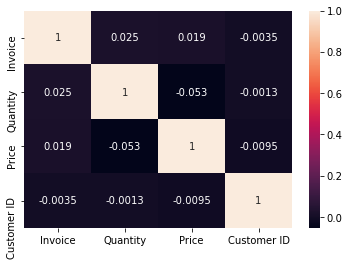

In [50]:
#Dataset sin datos nulos  FIGURA 1
sns.heatmap(df_united.corr(), annot=True)

<AxesSubplot:>

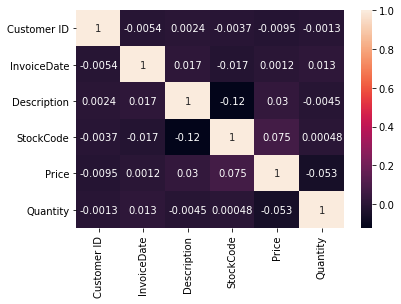

In [55]:
# datasetfinal  FIGURA 2
sns.heatmap(data_unido2.corr(), annot=True)

<AxesSubplot:>

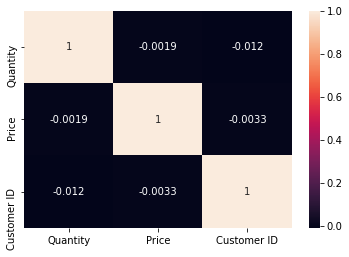

In [52]:
#dataset original  FIGURA 3
sns.heatmap(df.corr(), annot=True)

# Creación del archivo del dataset

In [62]:
# Creación del archivo
data_unido2.to_csv(r'C:\Users\Usuario\data mining\ProMD\dataset\Dataset40D.csv', index = False)

In [63]:
df_f2 = pd.read_csv('dataset/Dataset40D.csv')

In [70]:
df_f2

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578


### Distribución de Price y Quantity

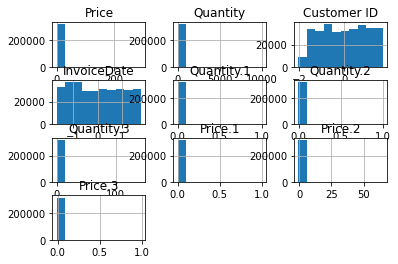

In [71]:
df_f2.drop(['StockCode'],1).hist()
plt.show()

In [72]:
# Transfomración de datos categóricos a numéricos
le = preprocessing.LabelEncoder()
pr = pd.DataFrame(df_f2['Price'])
qn = pd.DataFrame(df_f2['Quantity'])
# Se transforman todas las columnas
pr_tr = pr.apply(le.fit_transform)
qn_tr = qn.apply(le.fit_transform)

In [73]:
pr_qn_tr = pd.concat([pr_tr, qn_tr], axis=1,)

In [74]:
Standariza=(pr_qn_tr-pr_qn_tr.mean())/pr_qn_tr.std()
Standariza = pd.DataFrame(Standariza)

In [77]:
pr_qn_tr_2 = pd.concat([df_f2, Standariza], axis=1,)
pr_qn_tr_2

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3,Price,Quantity
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426,1.651157,0.113037
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015,-0.100860,2.122266
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,-0.672948,0.782780
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540,-0.386904,0.782780
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,-0.672948,0.782780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134,0.328205,-0.445083
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,0.667882,-0.500895
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,0.667882,-0.500895
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578,0.667882,-0.445083


In [78]:
pr_qn_tr_2.to_csv(r'C:\Users\Usuario\data mining\ProMD\dataset\Dataset40E.csv', index = False)

In [52]:
df_f2 = pd.read_csv('dataset/Dataset40E.csv')
df_f2

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3,Price.1.1,Quantity.1.1
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426,1.651157,0.113037
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015,-0.100860,2.122266
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,-0.672948,0.782780
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540,-0.386904,0.782780
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,-0.672948,0.782780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134,0.328205,-0.445083
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,0.667882,-0.500895
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,0.667882,-0.500895
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578,0.667882,-0.445083


### DecisionTree

In [89]:
# función para el entrenamiento
def modtrain(X_train, X_test, y_train_encode):
    # instancia la función para crear el árbol de decisión
    clf = DecisionTreeClassifier()
    # entrenamiento del modelo
    clf = clf.fit(X_train,y_train_encode)
    # predicción de los valores
    y_pred = clf.predict(X_test)
    return y_pred, clf

In [90]:
#Evaluación del modelo
def evalumodel(y_test, X_train, X_test, y_pred):
    #Precisión del modelo: ¿con qué frecuencia es correcto el clasificador?
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    #Precisión del modelo: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
    print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
    #Model Recall: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
    print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
    return y_test, X_train, X_test, y_pred

In [104]:
lab_enc = preprocessing.LabelEncoder()
y_train_encode = lab_enc.fit_transform(y_train)

In [105]:
y_test_encode = lab_enc.fit_transform(y_test)
X_train_encode=X_train.apply(LabelEncoder().fit_transform)
X_test_encode=X_test.apply(LabelEncoder().fit_transform)

In [106]:
y_pred, clf=modtrain(X_train_encode, X_test_encode, y_train_encode)

In [107]:
print("Accuracy:", metrics.accuracy_score(y_test_encode, y_pred))

Accuracy: 0.0004076427794966134
